# Step 1.0) Preparing the Data

In [8]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data      # shape (150, 4)
y = iris.target    # shape (150,)
print(iris.feature_names, iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] ['setosa' 'versicolor' 'virginica']


# Step 1.1)Split into training and test sets

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2.0) Choosing and Training a Model

In [10]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)

# Step 2.1) Train (fit) the model

In [11]:
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


# Step 3) Making Predictions

In [12]:
y_pred = model.predict(X_test)
print("Predictions:", y_pred[:5])
print("True labels:", y_test[:5])

Predictions: [1 0 2 1 1]
True labels: [1 0 2 1 1]


# Step 4.0) Evaluating the Model

In [13]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


# Step 4.1) Confusion Matrix

In [15]:
import pandas as pd
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=iris.target_names, columns=iris.target_names)

print("Confusion Matrix:")
display(cm_df)


Confusion Matrix:


,setosa,versicolor,virginica
setosa,10,0,0
versicolor,0,9,0
virginica,0,0,11


# Step 4.2) Plot + save confusion matrix

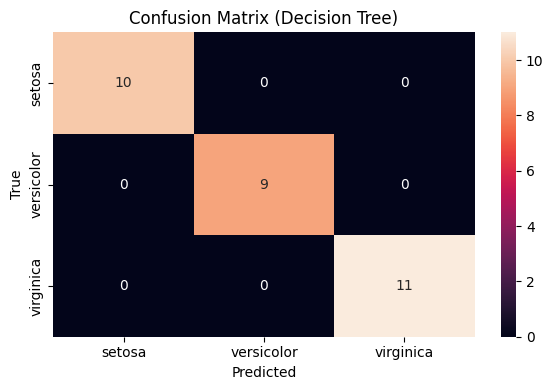

Saved figure to ../outputs/confusion_matrix.png


In [21]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# save to project-level outputs/ (.. goes up from notebooks/)
os.makedirs("../outputs", exist_ok=True)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Decision Tree)")
plt.tight_layout()
plt.savefig("../outputs/confusion_matrix.png")
plt.show()

print("Saved figure to ../outputs/confusion_matrix.png")


# Step 5)Iterating and Improving the Model

In [16]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
print("k-NN accuracy:", accuracy_score(y_test, y_pred2))

k-NN accuracy: 1.0


# Results & Discussion

This notebook trains a DecisionTreeClassifier on the Iris dataset with a train/test split of 80/20 (random_state=42).
Accuracy is shown above (expected ≥ 0.9). The confusion matrix shows true classes by rows and predicted classes by columns; the diagonal indicates correct predictions.

